<a href="https://colab.research.google.com/github/Sriyoshija/task1/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Investigation:
Passengers on manifest: 891

 Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2


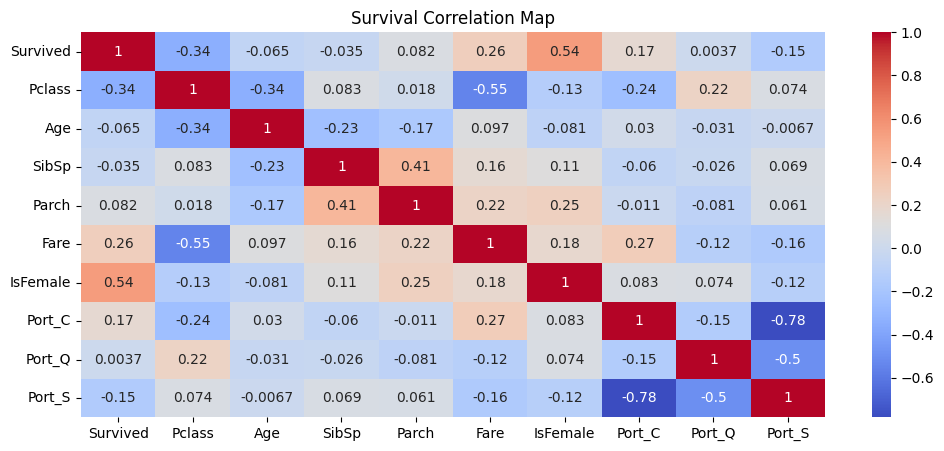


Cleaned Data Ready for Modeling!
New dimensions: (891, 10)

Sample Records:


,Survived,Pclass,Age,SibSp,Parch,Fare,IsFemale,Port_C,Port_Q,Port_S
0,0,3,-0.565736,1,0,-0.502445,0,0,0,1
1,1,1,0.663861,1,0,0.786845,1,1,0,0
2,1,3,-0.258337,0,0,-0.488854,1,0,0,1
3,1,1,0.433312,1,0,0.420730,1,0,0,1
4,0,3,0.433312,0,0,-0.486337,0,0,0,1


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/Titanic-Dataset.csv")

#display initial information
print("Initial Investigation:")
print(f"Passengers on manifest: {len(df)}")
print("\n Missing Values:")
print(df.isnull().sum().to_string())

#to handle missing data
df['Age'] = df['Age'].fillna(df['Age'].median())
df = df.drop('Cabin', axis=1)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#feature engineering and encoding
df['IsFemale'] = df['Sex'].map({'female': 1, 'male': 0})
df = df.drop('Sex', axis=1)
df = pd.get_dummies(df, columns=['Embarked'], prefix='Port', dtype=int) #One-Hot encode

#feature scaling
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1) #Removal of columns that are not relevant for modeling

#data visualization
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Survival Correlation Map")
plt.show()

print("\nCleaned Data Ready for Modeling!")
print(f"New dimensions: {df.shape}")
print("\nSample Records:")
display(df.head())